In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib
from scipy.stats import levene
from scipy import stats

matplotlib.rcParams['pdf.fonttype'] = 42
strain = 0.30

In [238]:
DTDC_first = pd.read_csv('TotalReplicates/ps_DoubleCross_10_0.4_het_first.csv')
DTDC_last  = pd.read_csv('TotalReplicates/ps_DoubleCross_10_0.4_het_last.csv')

FTNC_first = pd.read_csv('TotalReplicates/ps_FacTether-NoCross_10_0.4_het_first.csv')
FTNC_last  = pd.read_csv('TotalReplicates/ps_FacTether-NoCross_10_0.4_het_last.csv')

NTNC_first = pd.read_csv('TotalReplicates/ps_NoTether-NoCross_10_0.4_het_first.csv')
NTNC_last  = pd.read_csv('TotalReplicates/ps_NoTether-NoCross_10_0.4_het_last.csv')

In [239]:
num_replicates = 10
configs_per_replicate = 11

def calculate_replicate_means(df, num_replicates, configs_per_replicate):

    new_df = pd.DataFrame()

    new_df['x_axis'] = df.iloc[:, 0]
    
    for rep in range(num_replicates):
        start = 1 + rep * configs_per_replicate
        end = start + configs_per_replicate
        new_df[f'rep_{rep+1}'] = df.iloc[:, start:end].mean(axis=1)
    return new_df   

In [240]:

DTDC_last = calculate_replicate_means(DTDC_last, num_replicates, configs_per_replicate)
FTNC_last = calculate_replicate_means(FTNC_last, num_replicates, configs_per_replicate)
NTNC_last = calculate_replicate_means(NTNC_last, num_replicates, configs_per_replicate)

In [241]:
DTDC_first.columns = [DTDC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(DTDC_first.columns[1:])]
FTNC_first.columns = [FTNC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(FTNC_first.columns[1:])]
NTNC_first.columns = [NTNC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(NTNC_first.columns[1:])]

In [242]:
difference_DTDC = abs((DTDC_first.iloc[:,1:] - DTDC_last.iloc[:,1:]) / DTDC_first.iloc[:,1:])

difference_FTNC = abs((FTNC_first.iloc[:,1:] - FTNC_last.iloc[:,1:]) / FTNC_first.iloc[:,1:])

difference_NTNC = abs((NTNC_first.iloc[:,1:] - NTNC_last.iloc[:,1:]) / NTNC_first.iloc[:,1:])

sem_DTDC = difference_DTDC.sem(axis=1)
mean_DTDC = difference_DTDC.mean(axis=1)

sem_NTNC = difference_NTNC.sem(axis=1)
mean_NTNC = difference_NTNC.mean(axis=1)

sem_FTNC = difference_FTNC.sem(axis=1)
mean_FTNC = difference_FTNC.mean(axis=1)

difference_FTNC['x_axis'] = FTNC_first['0']
difference_DTDC['x_axis'] = DTDC_first['0']
difference_NTNC['x_axis'] = NTNC_first['0']

difference_FTNC['Mean'] = mean_FTNC
difference_FTNC['SEM'] = sem_FTNC

difference_DTDC['Mean'] = mean_DTDC
difference_DTDC['SEM'] = sem_DTDC

difference_NTNC['Mean'] = mean_NTNC
difference_NTNC['SEM'] = sem_NTNC

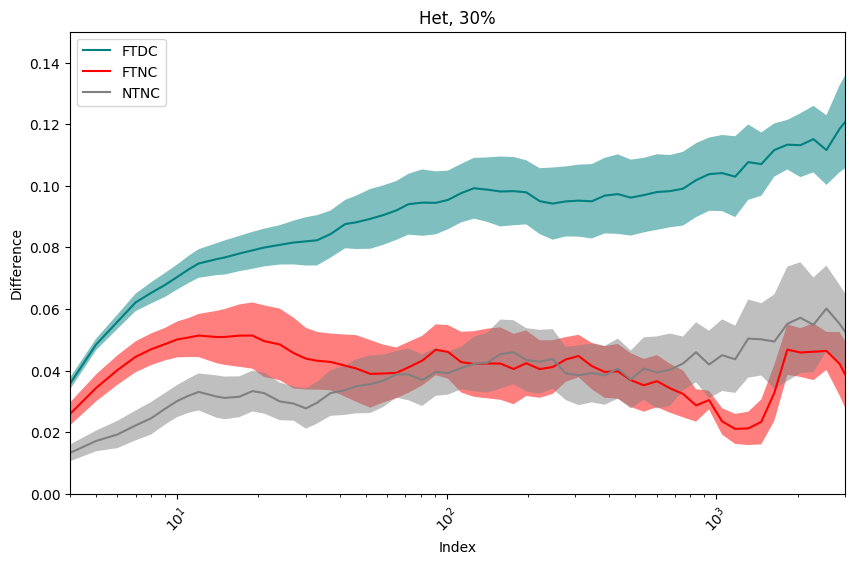

In [243]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=difference_DTDC['x_axis'], y=difference_DTDC['Mean'], label='FTDC', color='teal')
plt.fill_between(difference_DTDC['x_axis'], difference_DTDC['Mean'] - difference_DTDC['SEM'], difference_DTDC['Mean'] + difference_DTDC['SEM'], color='teal', alpha=0.5, linewidth=0)

sns.lineplot(x=difference_FTNC['x_axis'], y=difference_FTNC['Mean'], label='FTNC', color='red')
plt.fill_between(difference_FTNC['x_axis'], difference_FTNC['Mean'] - difference_FTNC['SEM'],   difference_FTNC['Mean'] + difference_FTNC['SEM'], color='red', alpha=0.5, linewidth=0)

sns.lineplot(x=difference_NTNC['x_axis'], y=difference_NTNC['Mean'], label='NTNC', color='gray')
plt.fill_between(difference_NTNC['x_axis'], difference_NTNC['Mean'] - difference_NTNC['SEM'], difference_NTNC['Mean'] + difference_NTNC['SEM'], color='gray', alpha=0.5, linewidth=0)

plt.xlabel('Index')
plt.xticks(difference_DTDC['x_axis'][:-2])   
plt.xscale('log')
plt.xticks(rotation=45)
plt.xlim(4, 3000)
plt.ylim(0, 0.15)
plt.ylabel('Difference')
plt.title('Het, 30%')
plt.legend()
plt.savefig('Deformatin_DC_vs_NTNC_het_30.pdf', format='pdf')
plt.show()

Levene Test for Homogeneity of Variance: 1.253, p-value: 0.302
Equal variance
***
T-statistic: 5.239111594629591, P-value: 5.549e-05
T-statistic: 0.13672235500116617, P-value: 8.928e-01


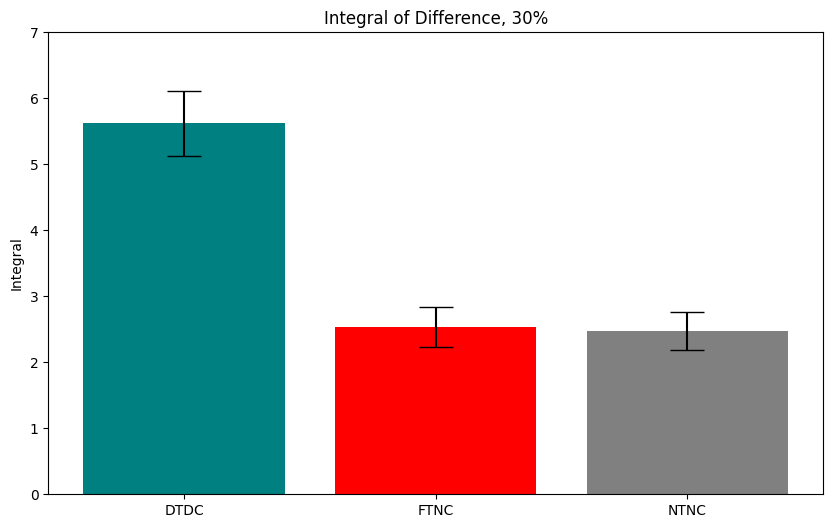

In [244]:
integral_NTNC = np.trapezoid(difference_NTNC.iloc[:62,:10].dropna(), axis=0, dx=1)
integral_DTDC = np.trapezoid(difference_DTDC.iloc[:62,:10].dropna(), axis=0, dx=1)
integral_FTNC = np.trapezoid(difference_FTNC.iloc[:62,:10].dropna(), axis=0, dx=1)

integral_NTNC_mean, integral_NTNC_sem = integral_NTNC.mean(), np.std(integral_NTNC) / np.sqrt(len(integral_NTNC))
integral_DTDC_mean, integral_DTDC_sem = integral_DTDC.mean(), np.std(integral_DTDC) / np.sqrt(len(integral_DTDC))
integral_FTNC_mean, integral_FTNC_sem = integral_FTNC.mean(), np.std(integral_FTNC) / np.sqrt(len(integral_FTNC))

levene_stat, levene_p = levene(integral_NTNC, integral_DTDC, integral_FTNC)

print(f'Levene Test for Homogeneity of Variance: {levene_stat:.3f}, p-value: {levene_p:.3f}')

if levene_p >= 0.05:
    print('Equal variance')
    t_stat, p_val = stats.ttest_ind(integral_DTDC, integral_NTNC, equal_var=True)
else:
    print('Unequal variance')
    t_stat, p_val = stats.ttest_ind(integral_DTDC, integral_NTNC, equal_var=False)

if p_val < 0.001:
    print('***')
elif p_val < 0.01:
    print('**')
elif p_val < 0.05:
    print('*')

print(f"T-statistic: {t_stat}, P-value: {p_val:.3e}")

t_stat, p_val = stats.ttest_ind(integral_FTNC, integral_NTNC)

print(f"T-statistic: {t_stat}, P-value: {p_val:.3e}")

plt.figure(figsize=(10, 6))

plt.bar(['DTDC', 'FTNC', 'NTNC'], [integral_DTDC_mean, integral_FTNC_mean, integral_NTNC_mean], yerr=[integral_DTDC_sem, integral_FTNC_sem, integral_NTNC_sem], capsize=12, color=['teal', 'red', 'gray'])

plt.ylabel('Integral')
plt.title('Integral of Difference, 30%')
plt.ylim(0,7)
plt.savefig('Integral_FTNC_vs_NTNC_het_30.pdf', format='pdf')
plt.show()



In [248]:
DTDC_first = pd.read_csv('TotalReplicates/ps_DoubleCross_10_0.4_euc_first.csv')
DTDC_last  = pd.read_csv('TotalReplicates/ps_DoubleCross_10_0.4_euc_last.csv')

FTNC_first = pd.read_csv('TotalReplicates/ps_FacTether-NoCross_10_0.4_euc_first.csv')
FTNC_last  = pd.read_csv('TotalReplicates/ps_FacTether-NoCross_10_0.4_euc_last.csv')

NTNC_first = pd.read_csv('TotalReplicates/ps_NoTether-NoCross_10_0.4_euc_first.csv')
NTNC_last  = pd.read_csv('TotalReplicates/ps_NoTether-NoCross_10_0.4_euc_last.csv')

In [249]:

DTDC_last = calculate_replicate_means(DTDC_last, num_replicates, configs_per_replicate)
FTNC_last = calculate_replicate_means(FTNC_last, num_replicates, configs_per_replicate)
NTNC_last = calculate_replicate_means(NTNC_last, num_replicates, configs_per_replicate)

DTDC_first.columns = [DTDC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(DTDC_first.columns[1:])]
FTNC_first.columns = [FTNC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(FTNC_first.columns[1:])]
NTNC_first.columns = [NTNC_first.columns[0]] + [f'rep_{i+1}' for i, col in enumerate(NTNC_first.columns[1:])]
difference_DTDC = abs((DTDC_first.iloc[:,1:] - DTDC_last.iloc[:,1:]) / DTDC_first.iloc[:,1:])

difference_FTNC = abs((FTNC_first.iloc[:,1:] - FTNC_last.iloc[:,1:]) / FTNC_first.iloc[:,1:])

difference_NTNC = abs((NTNC_first.iloc[:,1:] - NTNC_last.iloc[:,1:]) / NTNC_first.iloc[:,1:])

sem_DTDC = difference_DTDC.sem(axis=1)
mean_DTDC = difference_DTDC.mean(axis=1)

sem_NTNC = difference_NTNC.sem(axis=1)
mean_NTNC = difference_NTNC.mean(axis=1)

sem_FTNC = difference_FTNC.sem(axis=1)
mean_FTNC = difference_FTNC.mean(axis=1)

difference_FTNC['x_axis'] = FTNC_first['0']
difference_DTDC['x_axis'] = DTDC_first['0']
difference_NTNC['x_axis'] = NTNC_first['0']

difference_FTNC['Mean'] = mean_FTNC
difference_FTNC['SEM'] = sem_FTNC

difference_DTDC['Mean'] = mean_DTDC
difference_DTDC['SEM'] = sem_DTDC

difference_NTNC['Mean'] = mean_NTNC
difference_NTNC['SEM'] = sem_NTNC

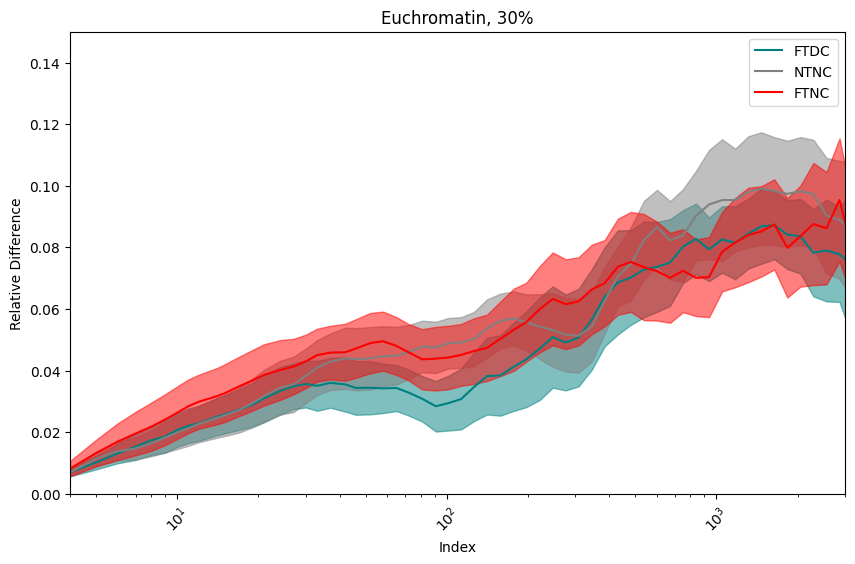

In [250]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=difference_DTDC['x_axis'], y=mean_DTDC, label='FTDC', color='teal')
plt.fill_between(difference_DTDC['x_axis'], mean_DTDC - sem_DTDC, mean_DTDC + sem_DTDC, color='teal', alpha=0.5)

sns.lineplot(x=difference_NTNC['x_axis'], y=mean_NTNC, label='NTNC', color='gray')
plt.fill_between(difference_NTNC['x_axis'], mean_NTNC - sem_NTNC, mean_NTNC + sem_NTNC, color='gray', alpha=0.5)

sns.lineplot(x=difference_FTNC['x_axis'], y=mean_FTNC, label='FTNC', color='red')
plt.fill_between(difference_FTNC['x_axis'], mean_FTNC - sem_FTNC, mean_FTNC + sem_FTNC, color='red', alpha=0.5)

plt.xlabel('Index')
plt.xticks(difference_DTDC['x_axis'][:-2])   
plt.xscale('log')
plt.xticks(rotation=45)
plt.xlim(4, 3000)
plt.ylabel('Relative Difference')
plt.ylim(0,0.15)
plt.title('Euchromatin, 30%')
plt.legend()
plt.savefig('Deformatin_DC_vs_NTNC_euc.pdf', format='pdf')
plt.show()

Levene Test for Homogeneity of Variance: 0.782, p-value: 0.468
Equal variance
T-statistic: -0.8694619541404361, P-value: 3.960e-01
T-statistic: -0.26575456434360667, P-value: 7.934e-01


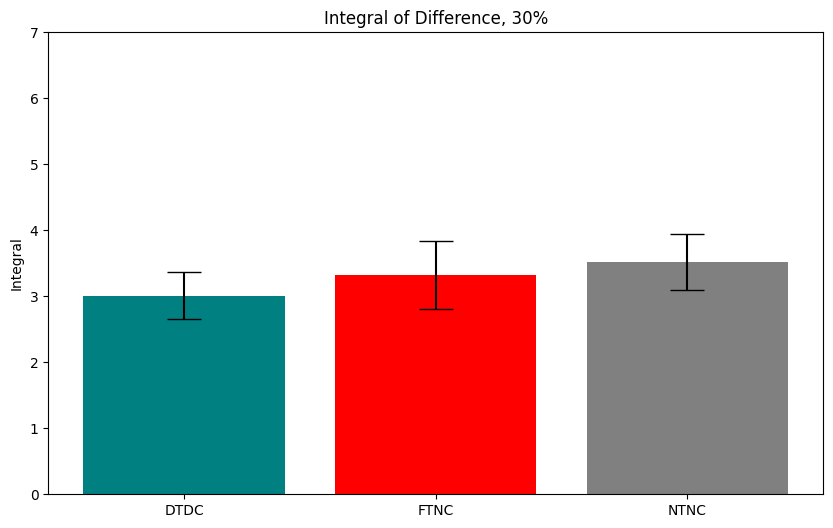

In [251]:
integral_NTNC = np.trapezoid(difference_NTNC.iloc[:62,:10].dropna(), axis=0, dx=1)
integral_DTDC = np.trapezoid(difference_DTDC.iloc[:62,:10].dropna(), axis=0, dx=1)
integral_FTNC = np.trapezoid(difference_FTNC.iloc[:62,:10].dropna(), axis=0, dx=1)

integral_NTNC_mean, integral_NTNC_sem = integral_NTNC.mean(), np.std(integral_NTNC) / np.sqrt(len(integral_NTNC))
integral_DTDC_mean, integral_DTDC_sem = integral_DTDC.mean(), np.std(integral_DTDC) / np.sqrt(len(integral_DTDC))
integral_FTNC_mean, integral_FTNC_sem = integral_FTNC.mean(), np.std(integral_FTNC) / np.sqrt(len(integral_FTNC))

levene_stat, levene_p = levene(integral_NTNC, integral_DTDC, integral_FTNC)

print(f'Levene Test for Homogeneity of Variance: {levene_stat:.3f}, p-value: {levene_p:.3f}')

if levene_p >= 0.05:
    print('Equal variance')
    t_stat, p_val = stats.ttest_ind(integral_DTDC, integral_NTNC, equal_var=True)
else:
    print('Unequal variance')
    t_stat, p_val = stats.ttest_ind(integral_DTDC, integral_NTNC, equal_var=False)

if p_val < 0.001:
    print('***')
elif p_val < 0.01:
    print('**')
elif p_val < 0.05:
    print('*')

print(f"T-statistic: {t_stat}, P-value: {p_val:.3e}")

t_stat, p_val = stats.ttest_ind(integral_FTNC, integral_NTNC)

print(f"T-statistic: {t_stat}, P-value: {p_val:.3e}")

plt.figure(figsize=(10, 6))

plt.bar(['DTDC', 'FTNC', 'NTNC'], [integral_DTDC_mean, integral_FTNC_mean, integral_NTNC_mean], yerr=[integral_DTDC_sem, integral_FTNC_sem, integral_NTNC_sem], capsize=12, color=['teal', 'red', 'gray'])

plt.ylabel('Integral')
plt.title('Integral of Difference, 30%')
plt.ylim(0,7)
plt.savefig('Integral_FTNC_vs_NTNC_euc.pdf', format='pdf')
plt.show()

